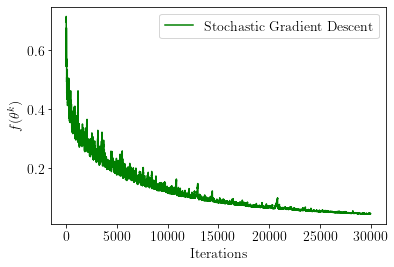

The value of theta at local minima :
 [ -0.75167322   2.33456313   1.0477433    8.77670364  -2.4336022
  -0.9625556   -7.30899505  -4.2488939    1.6991386    3.89341344
   8.4899589  -12.1699574   -1.17490464  -4.14522904   8.15886362
   9.42800067  -8.37213139   1.47959992  -1.07297425 -11.62248559]


In [84]:
'''
Problem 1
'''

import numpy as np
import matplotlib.pyplot as plt

N, p = 30, 20
np.random.seed(0)
X = np.random.randn(N,p)
Y = 2 * np.random.randint(2, size = N)-1

theta = np.zeros(p)
alpha = 0.1

iter = 30000
f_val = []
for _ in range(iter):
    ind = np.random.randint(N)
    theta -= alpha * np.exp(-Y[ind]*X[ind]@theta) * (-Y[ind]) / (1 + np.exp(-Y[ind]*X[ind]@theta)) * X[ind]
    f_val.append(np.mean(np.log(1 + np.exp(-Y * (X@theta)))))

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', size = 14)
plt.plot(list(range(iter)),f_val, color = "green", label = "Stochastic Gradient Descent")
plt.xlabel('Iterations')
plt.ylabel(r'$f(\theta^k)$')
plt.legend()
plt.show()

print("The value of theta at local minima :\n", theta)

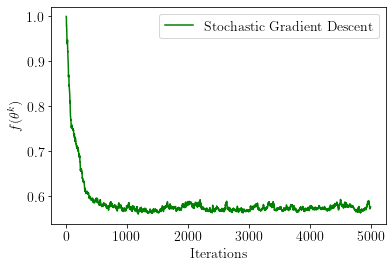

The value of theta at local minima :
 [ 0.00313009 -0.02494476 -0.32168     0.08753621 -0.08143104 -0.0892146
 -0.33896202 -0.11494218  0.40770613 -0.03842419  0.08434389 -0.0875235
  0.03556869 -0.17401855  0.24652553  0.29203176 -0.3926429  -0.06152473
 -0.08920943 -0.44918548]
Empirically, SGD does not encounter a point of non-differentiability.


In [49]:
'''
Problem 2
'''

import numpy as np
import matplotlib.pyplot as plt

N, p = 30, 20
np.random.seed(0)
X = np.random.randn(N,p)
Y = 2 * np.random.randint(2, size = N)-1

theta = np.zeros(p)
alpha = 0.005
lam = 0.1

iter = 5000
f_val = []
for _ in range(iter):
    ind = np.random.randint(N)
    grad = np.zeros(p)

    if Y[ind] * X[ind]@theta < 1 :
        grad += -Y[ind] * X[ind]
    elif Y[ind] * X[ind]@theta == 1:
        print("Encountered a point of non-diffrentiability!")
    grad += 2 * lam * theta
    
    theta -= alpha * grad

    f_val.append(np.mean(np.maximum(0, 1 - Y * (X@theta))) + lam * np.linalg.norm(theta) ** 2)

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', size = 14)
plt.plot(list(range(iter)),f_val, color = "green", label = "Stochastic Gradient Descent")
plt.xlabel('Iterations')
plt.ylabel(r'$f(\theta^k)$')
plt.legend()
plt.show()

print("The value of theta at local minima :\n", theta)
print("Empirically, SGD does not encounter a point of non-differentiability.")

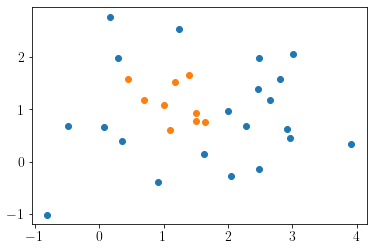

The data is not linearly separable.


In [55]:
'''
Problem3
'''

import numpy as np
import matplotlib.pyplot as plt


N = 30
np.random.seed(0)
X = np.random.randn(2, N)
y = np.sign(X[0,:] ** 2 + X[1 ,:] ** 2 - 0.7)
theta = 0.5
c, s = np.cos(theta), np.sin(theta)
X = np.array([[c, -s], [s, c]])@X
X = X + np.array([[1] ,[1]])

plt.plot(X[0, y==1], X[1, y==1], marker='o', linestyle='none')
plt.plot(X[0, y==-1], X[1, y==-1], marker='o', linestyle='none')
plt.show()

print("The data is not linearly separable.")

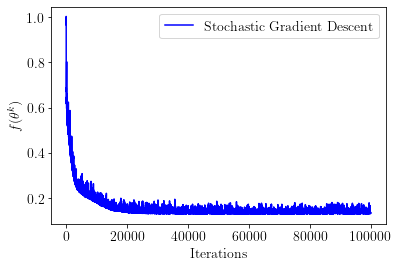

In [56]:
def transform(X):
    data = np.ones((N, 5))
    data[:, 1] = X[0,:]
    data[:, 2] = X[0,:] ** 2
    data[:, 3] = X[1,:]
    data[:, 4] = X[1,:] ** 2
    return data

new_X = transform(X)

w = np.zeros(5)

alpha = 0.01
lam = 0.001

iter = 100000
f_val = []
for _ in range(iter):
    ind = np.random.randint(N)
    grad = np.zeros(5)

    if y[ind] * new_X[ind]@w < 1 :
        grad += -y[ind] * new_X[ind]
    
    grad += 2 * lam * w
    
    w -= alpha * grad

    f_val.append(np.mean(np.maximum(0, 1 - y * (new_X@w))) + lam * np.linalg.norm(w) ** 2)

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', size = 14)
plt.plot(list(range(iter)),f_val, color = "blue", label = "Stochastic Gradient Descent")
plt.xlabel('Iterations')
plt.ylabel(r'$f(\theta^k)$')
plt.legend()
plt.show()

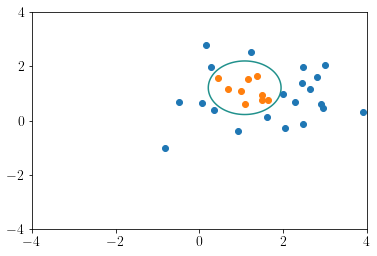

In [57]:
xx = np.linspace(-4, 4, 1024)
yy = np.linspace(-4, 4, 1024)
xx, yy = np.meshgrid(xx, yy)

Z = w[0] + (w[1] * xx + w[2] * xx **2) + (w[3] * yy + w[4] * yy **2)

plt.plot(X[0, y==1], X[1, y==1], marker='o', linestyle='none')
plt.plot(X[0, y==-1], X[1, y==-1], marker='o', linestyle='none')
plt.contour(xx , yy , Z, 0)
plt.show()

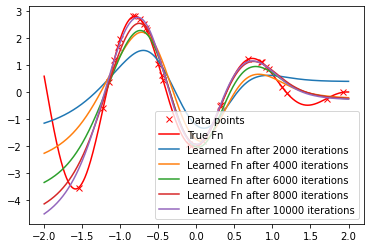

The final trained function is similar with the true function. However, it cannot imitate the true function in the area lacking data such as x < -1.5.


In [13]:
'''
Problem 7
'''

import numpy as np
import matplotlib.pyplot as plt

def f_true(x) :
    return (x-2)*np.cos(x*4)

def sigmoid(x) :
    return 1 / (1 + np.exp(-x))

def sigmoid_prime(x) :
    return sigmoid(x) * (1 - sigmoid(x))

K = 10000
alpha = 0.007
N, p = 30, 50
np.random.seed(0)
a0 = np.random.normal(loc = 0.0, scale = 4.0, size = p)
b0 = np.random.normal(loc = 0.0, scale = 4.0, size = p)
u0 = np.random.normal(loc = 0, scale = 0.05, size = p)
theta = np.concatenate((a0,b0,u0))


X = np.random.normal(loc = 0.0, scale = 1.0, size = N)
Y = f_true(X)

def f_th(theta, x) :
    return np.sum(theta[2*p : 3*p] * sigmoid(theta[0 : p] * np.reshape(x,(-1,1)) + theta[p : 2*p]), axis=1)

def diff_f_th(theta, x) :

    grad_a = sigmoid_prime(theta[:p] * x + theta[p:2*p]) * theta[2*p:3*p] * x
    grad_b = sigmoid_prime(theta[:p] * x + theta[p:2*p]) * theta[2*p:3*p]
    grad_u = sigmoid(theta[:p] * x + theta[p:2*p])

    return np.concatenate((grad_a,grad_b,grad_u))

xx = np.linspace(-2,2,1024)
plt.plot(X,f_true(X),'rx',label='Data points')
plt.plot(xx,f_true(xx),'r',label='True Fn')

for k in range(K) :
    
    ind = np.random.randint(N)
    grad = diff_f_th(theta, X[ind]) * (f_th(theta, X[ind]) - Y[ind])
    theta -= alpha * grad

    if (k+1)%2000 == 0 :
        plt.plot(xx,f_th(theta, xx),label=f'Learned Fn after {k+1} iterations')

plt.legend()
plt.show()
print("The final trained function is similar with the true function. However, it cannot imitate the true function in the area lacking data such as x < -1.5.")